In [1]:
from preprocess_watermarks import strech_contrast, remove_ink, top_minus_back, lighten_image, remove_darker_foreground, remove_nonuniform_background, wrap_image, im_show
import cv2
import numpy as np

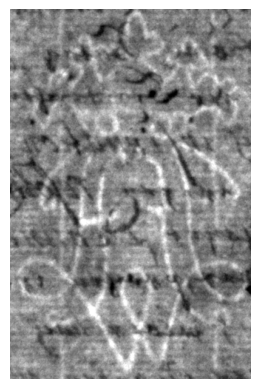

In [5]:
path = "/Users/pauli/Documents/Studium/Master/4_Semester/TUM_DI_Lab/Data_Labeling/TestsetAnnotated/processed/trainA/0027731_2-0.jpg"
path2 = "/Users/pauli/Documents/Studium/Master/4_Semester/TUM_DI_Lab/Data_Labeling/TestsetAnnotated/processed/input_benchmarking/0005019_1-01-0.png"
image = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
im_show(image)

In [6]:
def preprocess_watermark(image):
    image = strech_contrast(image)
    im_show(image)
    image = remove_ink(image)
    im_show(image)
    image = top_minus_back(image)
    im_show(image)
    image, adjusted = lighten_image(image)
    im_show(image)
    image_store = image
    image, eroded, dilated = remove_darker_foreground(adjusted)
    im_show(image)
    image = remove_nonuniform_background(image)
    im_show(image)
    image = wrap_image(image, n=0)
    im_show(image)
    alpha = 0.7
    image = cv2.addWeighted(image, alpha, image_store, 1-alpha, 0.0)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    im_show(image)

    return image


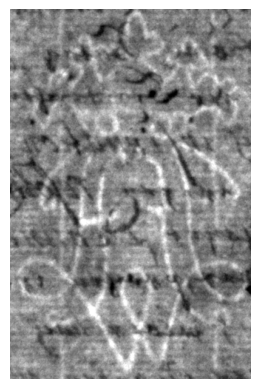

In [7]:
im_show(strech_contrast(image))

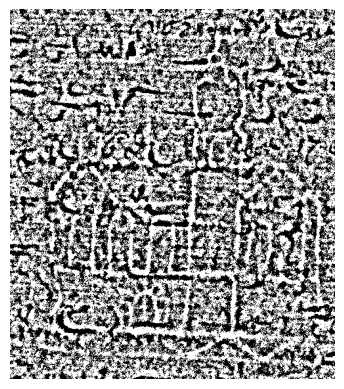

In [45]:
thresh1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 31,2)
im_show(thresh1)

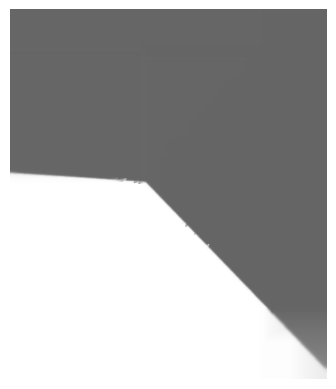

In [49]:
im_show(remove_ink(image))